In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, minmax_scale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sys 
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import np_utils
import tensorflow as tf
#from keras.regularizers import L1L2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.utils import shuffle
#from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from featurewiz import featurewiz
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
np.random.seed(19680801)

Imported version = 0.1.70.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


pct_is_new                   0.111456
pct_is_newish                0.103262
n_biggest_anc                0.067415
pct_of_biggest_anc           0.022574
pct_of_secbiggest_anc_new    0.039359
pct_top_5_anc                0.022648
wrcr                         0.063189
rcr_mid                      0.114117
rcr_hi                       0.088574
human                        0.124285
animal                       0.139776
molecular_cellular           0.080553
is_clinical                  0.120856
is_research_article          0.138533
cited_by_clin                0.150842
nih                          0.106868
rage                         0.037880
dtype: float64


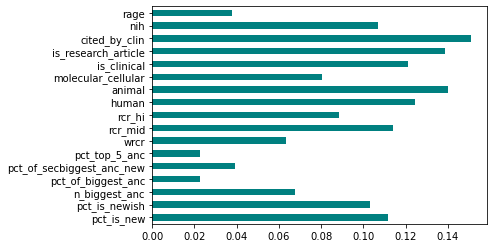

[0.59073319] [[ 6.19878230e-01  5.06719468e-01  1.34233580e-05  4.83219349e-01
   8.21613391e-02  5.76534355e-01 -2.20338761e-02  1.43318461e+00
   1.22636911e+00  2.09090922e+00 -5.99536180e-01 -7.62250317e-01
   4.29989489e-01 -6.60660656e-02  1.35265069e+00 -1.43875187e-01
  -6.36715565e-01]] 0.7757847533632287
cross validated f1 score  0.7801383399209486


In [2]:
#best f1 score
x_train = pd.read_csv("data_84.csv")
y_train = x_train['class']
x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)
x_train[['pct_of_biggest_anc','wrcr','rcr_hi']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','wrcr','rcr_hi']])


importance = mutual_info_classif(x_train,y_train)
feat_imp = pd.Series(importance,x_train.columns[0:len(x_train.columns)])
print(feat_imp)
feat_imp.plot(kind = 'barh',color = 'teal')
plt.show()

#x_train =  StandardScaler().fit_transform(x_train) 



y_train = np.array(y_train)
model = LogisticRegression(random_state=0, C = 10).fit(x_train,y_train) ##logistioc
    
print(model.intercept_, model.coef_, model.score(x_train, y_train))
scores = cross_val_score(model, x_train, y_train, cv=10,scoring = "f1")
print("cross validated f1 score ",scores.mean())

actual len  5621
len of xtest  1479
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1978
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1479,)
no of positive  1090
len of predy  729


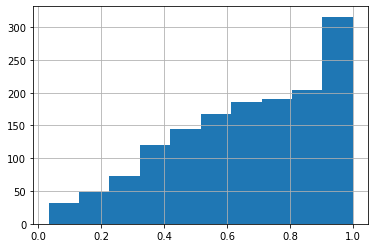

$$$  1479   729
total positive  729
tp tn fp fn 0   0   0   0
year  1978 positive  0
actual len  5840
len of xtest  1463
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  218
year   1979
[1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7346642246642248
(1463,)
no of positive  1033
len o

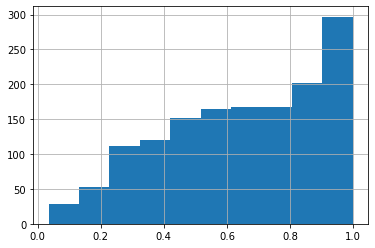

$$$  1463   678
total positive  678
tp tn fp fn 1   0   0   0
year  1979 positive  1
actual len  6110
len of xtest  1421
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1980
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1421,)
no of positive  1003


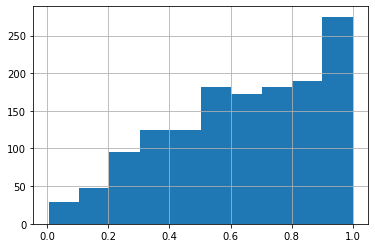

$$$  1421   651
total positive  651
tp tn fp fn 0   0   0   0
year  1980 positive  0
actual len  6410
len of xtest  1555
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1981
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1555,)
no of positive  1081


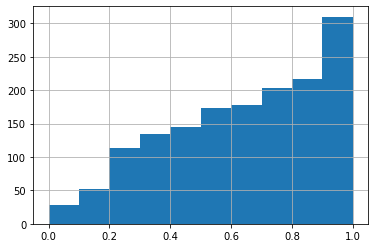

$$$  1555   731
total positive  731
tp tn fp fn 0   0   0   0
year  1981 positive  0
actual len  6647
len of xtest  1521
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1982
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1521,)
no of positive  1016


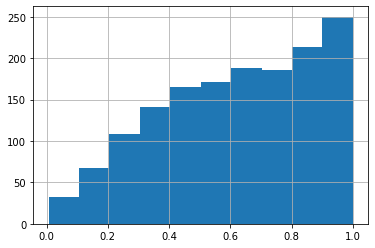

$$$  1521   652
total positive  652
tp tn fp fn 0   0   0   0
year  1982 positive  0
actual len  6902
len of xtest  1544
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1983
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1544,)
no of positive  1021


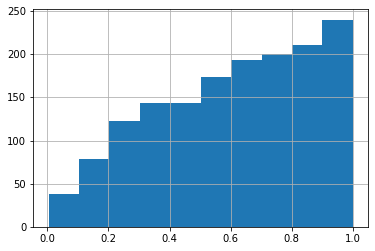

$$$  1544   652
total positive  652
tp tn fp fn 0   0   0   0
year  1983 positive  0
actual len  7233
len of xtest  1581
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1984
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1581,)
no of positive  1032


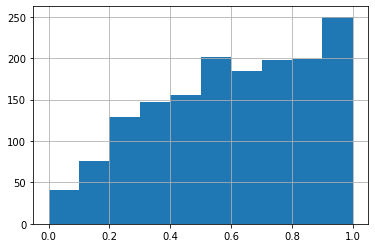

$$$  1581   647
total positive  647
tp tn fp fn 0   0   0   0
year  1984 positive  0
actual len  7596
len of xtest  1621
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1985
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1621,)
no of positive  1022


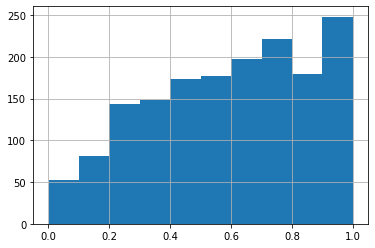

$$$  1621   650
total positive  650
tp tn fp fn 0   0   0   0
year  1985 positive  0
actual len  7987
len of xtest  1685
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1986
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1685,)
no of positive  1034


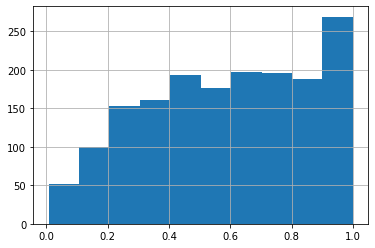

$$$  1685   661
total positive  661
tp tn fp fn 0   0   0   0
year  1986 positive  0
actual len  8301
len of xtest  1702
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1987
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1702,)
no of positive  1016


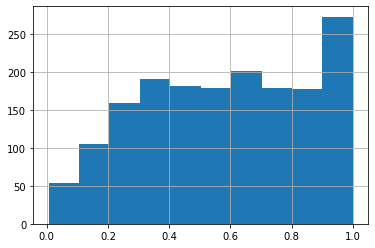

$$$  1702   632
total positive  632
tp tn fp fn 0   0   0   0
year  1987 positive  0
actual len  8743
len of xtest  1763
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1988
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1763,)
no of positive  1064


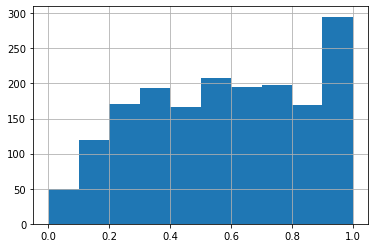

$$$  1763   662
total positive  662
tp tn fp fn 0   0   0   0
year  1988 positive  0
actual len  9089
len of xtest  1817
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1989
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1817,)
no of positive  1067


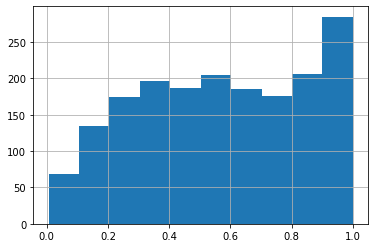

$$$  1817   669
total positive  669
tp tn fp fn 0   0   0   0
year  1989 positive  0
actual len  9467
len of xtest  1880
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1990
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(1880,)
no of positive  1095


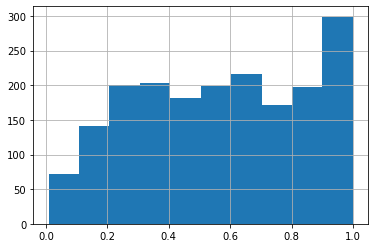

$$$  1880   670
total positive  670
tp tn fp fn 0   0   0   0
year  1990 positive  0
actual len  9825
len of xtest  1956
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  217
year   1991
[1979 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7459670884670884
(1956,)
no of positive  1127
len o

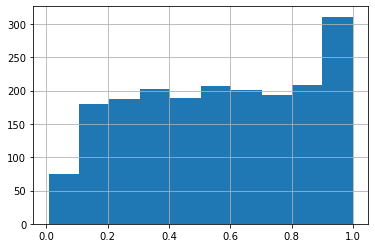

$$$  1956   717
total positive  717
tp tn fp fn 1   0   1   0
year  1991 positive  1
actual len  10202
len of xtest  1984
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  217
year   1992
[1979 1991 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.785461482961483
(1984,)
no of positive  940
len of

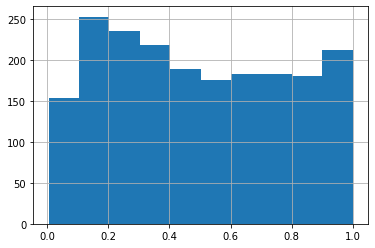

$$$  1984   576
total positive  576
tp tn fp fn 0   1   0   1
year  1992 positive  1
actual len  10609
len of xtest  2039
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  217
year   1993
[1979 1991 1992 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7831407481407482
(2039,)
no of positive  971
len o

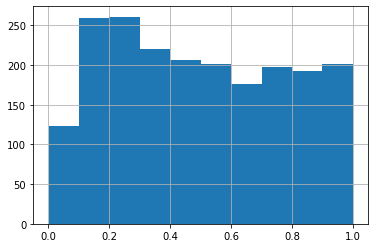

$$$  2039   591
total positive  591
tp tn fp fn 1   0   0   0
year  1993 positive  1
actual len  10974
len of xtest  2093
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  218
year   1994
[1979 1991 1992 1993 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7291580641580642
(2093,)
no of positive  1010
len 

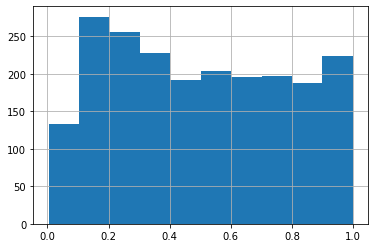

$$$  2093   608
total positive  608
tp tn fp fn 0   1   0   0
year  1994 positive  0
actual len  11393
len of xtest  2165
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1995
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(2165,)
no of positive  1162

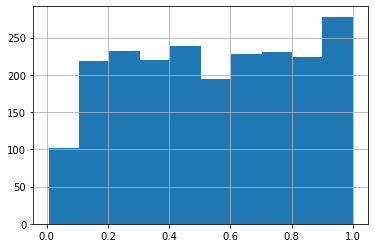

$$$  2165   735
total positive  735
tp tn fp fn 0   0   0   0
year  1995 positive  0
actual len  11780
len of xtest  2178
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  217
year   1996
[1979 1991 1992 1993 1994 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7697533022533023
(2178,)
no of positive  1145
len 

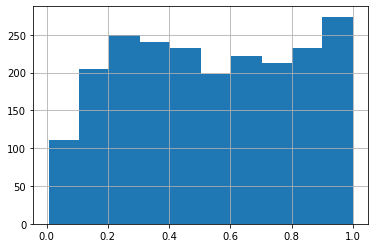

$$$  2178   723
total positive  723
tp tn fp fn 1   1   0   0
year  1996 positive  1
actual len  12157
len of xtest  2191
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1997
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(2191,)
no of positive  1101

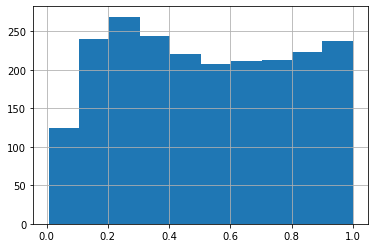

$$$  2191   680
total positive  680
tp tn fp fn 0   0   0   0
year  1997 positive  0
actual len  12606
len of xtest  2173
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  213
year   1998
[1979 1991 1992 1993 1994 1996 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7286691086691086
(2173,)
no of positive  1059
len 

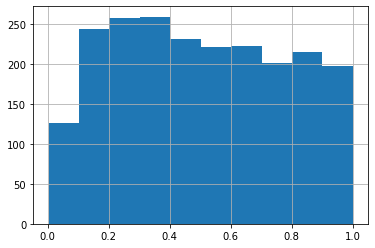

$$$  2173   614
total positive  614
tp tn fp fn 2   1   0   1
year  1998 positive  3
actual len  13116
len of xtest  2194
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  215
year   1999
[1979 1991 1992 1993 1994 1996 1998 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7404961704961706
(2194,)
no of positive  1051
len 

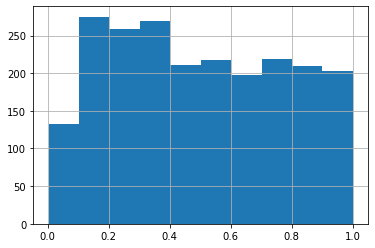

$$$  2194   633
total positive  633
tp tn fp fn 0   2   0   2
year  1999 positive  2
actual len  13664
len of xtest  2213
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  213
year   2000
[1979 1991 1992 1993 1994 1996 1998 1999 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7354417804417803
(2213,)
no of positive  1074
len 

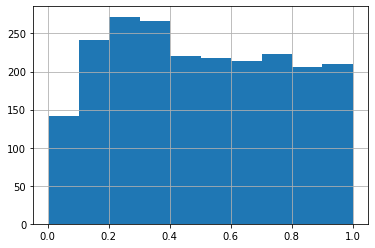

$$$  2213   640
total positive  640
tp tn fp fn 2   0   1   1
year  2000 positive  3
actual len  14240
len of xtest  2244
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   2001
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(2244,)
no of positive  1041

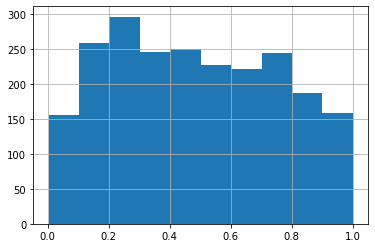

$$$  2244   591
total positive  591
tp tn fp fn 0   0   0   0
year  2001 positive  0
actual len  14757
len of xtest  2280
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   2002
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(2280,)
no of positive  1031

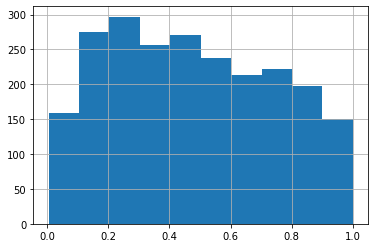

$$$  2280   574
total positive  574
tp tn fp fn 0   0   0   0
year  2002 positive  0
actual len  15262
len of xtest  2279
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  217
year   2003
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.74253108003108
(2279,)
no of positive  839
len of 

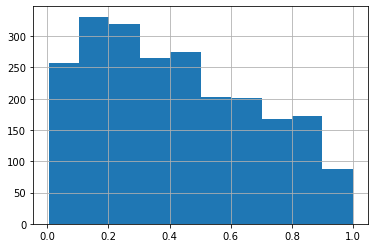

$$$  2279   429
total positive  429
tp tn fp fn 1   1   0   0
year  2003 positive  1
actual len  15787
len of xtest  2248
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   2004
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(2248,)
no of positive  949


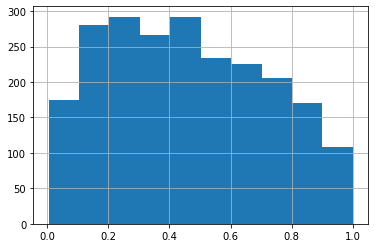

$$$  2248   486
total positive  486
tp tn fp fn 0   0   0   0
year  2004 positive  0
actual len  16382
len of xtest  2227
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   2005
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7344405594405594
(2227,)
no of positive  930


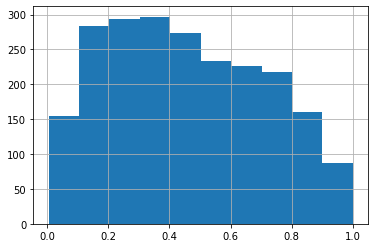

$$$  2227   467
total positive  467
tp tn fp fn 0   0   0   0
year  2005 positive  0
actual len  17084
len of xtest  2242
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  218
year   2006
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7381440781440781
(2242,)
no of positive  911
len o

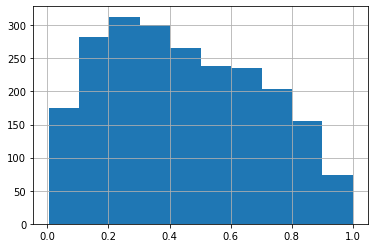

$$$  2242   436
total positive  436
tp tn fp fn 1   0   0   0
year  2006 positive  1
actual len  17653
len of xtest  2261
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  213
year   2007
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7280594405594406
(2261,)
no of positive  780
len o

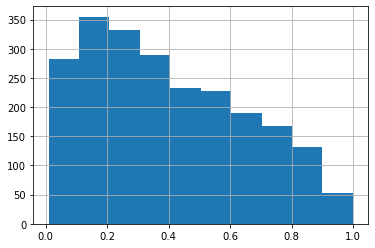

$$$  2261   357
total positive  357
tp tn fp fn 3   0   1   0
year  2007 positive  3
actual len  18303
len of xtest  2288
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  211
year   2008
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7491797091797091
(2288,)
no of positive  884
len o

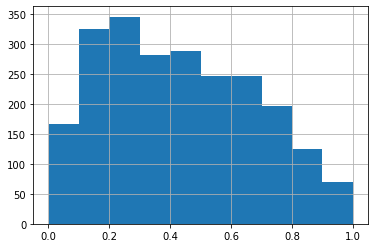

$$$  2288   390
total positive  390
tp tn fp fn 4   2   1   0
year  2008 positive  4
actual len  18833
len of xtest  2341
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  207
year   2009
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7274869574869575
(2341,)
no of positive  818
len o

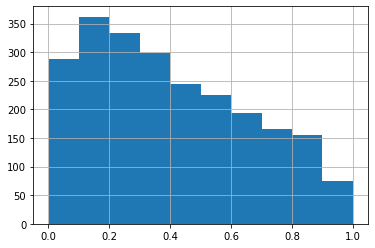

$$$  2341   397
total positive  397
tp tn fp fn 5   3   2   1
year  2009 positive  6
actual len  19499
len of xtest  2372
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  203
year   2010
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7602852702852703
(2372,)
no of positive  843
len o

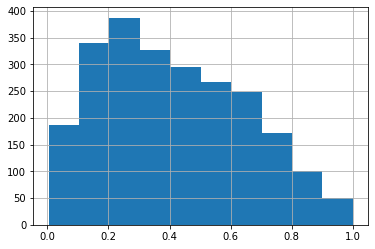

$$$  2372   325
total positive  325
tp tn fp fn 4   6   0   4
year  2010 positive  8
actual len  20126
len of xtest  2420
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  195
year   2011
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.727489454989455
(2420,)
no of positive  826
len of

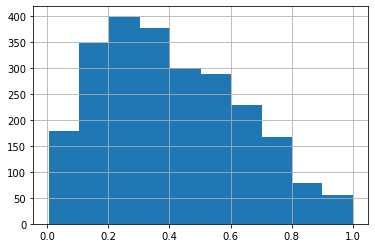

$$$  2420   304
total positive  304
tp tn fp fn 7   7   1   6
year  2011 positive  13
actual len  20856
len of xtest  2507
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  193
year   2012
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7591161616161615
(2507,)
no of positive  859
len 

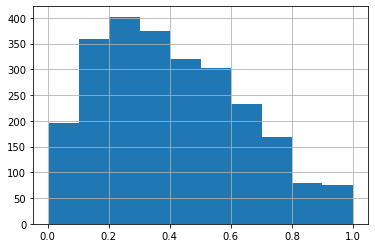

$$$  2507   322
total positive  322
tp tn fp fn 2   9   0   12
year  2012 positive  14
actual len  21671
len of xtest  2580
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  194
year   2013
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7696717171717172
(2580,)
no of positive  872
len

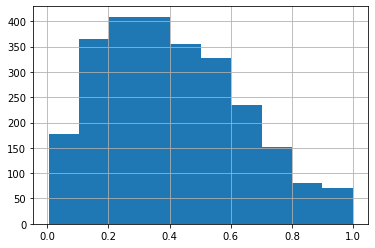

$$$  2580   303
total positive  303
tp tn fp fn 6   9   0   7
year  2013 positive  13
actual len  22577
len of xtest  2638
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  202
year   2014
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2015 2016 2017 2018 2019 2020]
cv score  0.7416705516705517
(2638,)
no of positive  833
len 

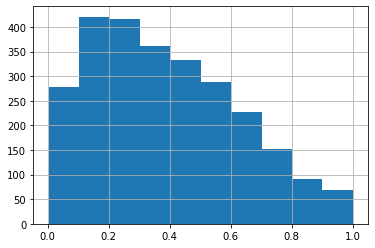

$$$  2638   313
total positive  313
tp tn fp fn 5   5   1   4
year  2014 positive  9
actual len  23437
len of xtest  2737
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  213
year   2015
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2016 2017 2018 2019 2020]
cv score  0.7316217116217116
(2737,)
no of positive  818
len o

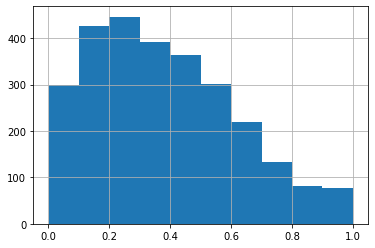

$$$  2737   291
total positive  291
tp tn fp fn 1   2   0   2
year  2015 positive  3
actual len  24395
len of xtest  2795
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  211
year   2016
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2017 2018 2019 2020]
cv score  0.7685120435120435
(2795,)
no of positive  786
len o

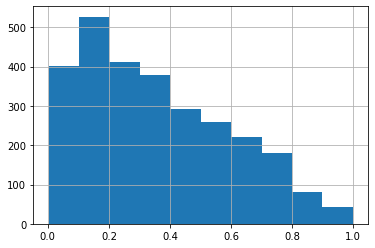

$$$  2795   306
total positive  306
tp tn fp fn 2   4   0   2
year  2016 positive  4
actual len  25382
len of xtest  2905
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  207
year   2017
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2018 2019 2020]
cv score  0.7525796425796426
(2905,)
no of positive  791
len o

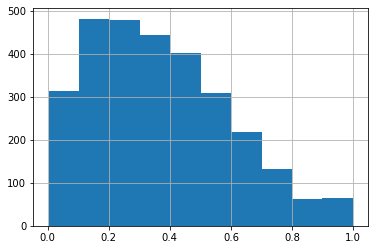

$$$  2905   263
total positive  263
tp tn fp fn 0   4   0   6
year  2017 positive  6
actual len  26313
len of xtest  2990
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  203
year   2018
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2019 2020]
cv score  0.7876551226551226
(2990,)
no of positive  773
len o

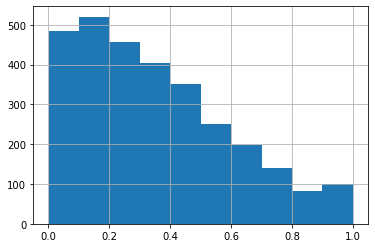

$$$  2990   324
total positive  324
tp tn fp fn 2   5   2   5
year  2018 positive  7
actual len  27361
len of xtest  3139
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  209
year   2019
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2020]
cv score  0.760535853035853
(3139,)
no of positive  782
len of

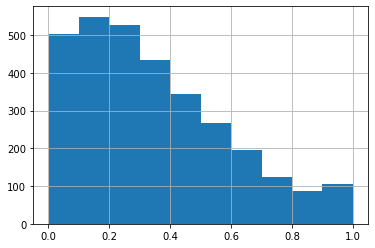

$$$  3139   318
total positive  318
tp tn fp fn 1   3   1   3
year  2019 positive  4
actual len  28712
len of xtest  3248
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  215
year   2020
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7245124320124321
(3248,)
no of positive  836
len o

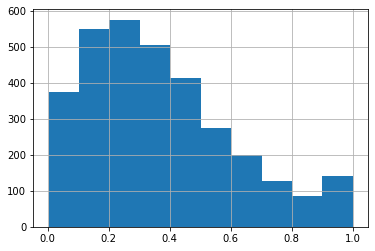

$$$  3248   355
total positive  355
tp tn fp fn 0   1   0   2
year  2020 positive  2
total pos  111  true pos  52  total false pos  527.9069767441861


In [37]:
##logistic regression
def recall2(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]
    ll = 350
    tot = 0
    ress = pd.merge(data,pred,on='cluster', how = 'inner')
    
    tp,tn,fp, fn = 0,0,0,0
    pred = pred.sort_values(by=['pred_log'], ascending = False)
    res = pred.head(ll)
    for ind in res.index:
        cl = res['cluster'][ind]
        dd = data[data['cluster'] == cl]
        if len(dd) != 0:
            dd = dd.to_numpy()
            cls = dd[0][dd.shape[1] - 1]
            if cls == 1:
                tp += 1
            else:
                fp += 1
        else:
            fp += 1
       
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", ll)
    print("tp fp",tp," ",fp)
    total_pos = len(ress[ress['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,ll - tp

def recall(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]

    tot = 0
    res = pd.merge(data,pred,on='cluster', how = 'inner')
    tp,tn,fp, fn = 0,0,0,0
    for ind in res.index:
        if res['class'][ind] == 1 and res['pred_log'][ind] >= th:
            tp += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] < th:
            tn += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] >= th:
            fp += 1
        elif res['class'][ind] == 1 and res['pred_log'][ind] < th:
            fn += 1
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", len(pred))
    print("tp tn fp fn",tp," ",tn," ",fp," ",fn)
    total_pos = len(res[res['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,len(pred[pred['pred_log'] >= th]) - tp


def train(x_train):
    
    
  
    y_train = x_train['class']
    
    x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)
    
    '''x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    
    
    '''x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','class'], axis = 1)
    '''
    
    y_train = np.array(y_train)
 
    model = LogisticRegression(random_state=0, C = 1).fit(x_train,y_train) ##logistioc
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model
    
tot,tp,total_fp = 0,0,0
yr = 1978

while yr <= 2020:
    
    x_train = pd.read_csv("data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_direct/features_prediction_"+str(yr)+".csv")
    print("actual len ",len(x_test))
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    
   
    #x_test = x_test[x_test['n_biggest_anc'] >= 500]
    x_test = x_test[x_test['rcr_hi'] >= 2.00]
    #x_test = x_test[x_test['cited_by_clin'] >= 0.080]
    #x_test = x_test[x_test['is_clinical'] >= 0.012] ##this one
    #x_test = x_test[x_test['animal'] >= 0.02]

    #x_test = x_test[x_test['molecular_cellular'] >= 0.030] ##this one, with C = 1
    #x_test = x_test[x_test['nih'] >= 0.025]
    #x_test = x_test[x_test['human'] >= 0.25]
    #x_test = x_test[x_test['rage'] >= 5]
    #x_test = x_test[x_test['pct_is_new'] >= 0.09]
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    #print(x_test.tail(10))
    
    #x_test = x_test[x_test['is_research_article'] > 0.75]
    
    x_test = x_test.drop(['prediction','cluster','year','n',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)
    
    '''x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    print(x_test.dtypes)
    '''x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_test = x_test.drop(['cluster','year','n','pct_is_newish','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)
    x_test = x_test.drop(['prediction','pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low'], axis=1)
    '''
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))
    print("year  ",yr)
    print(x_train['year'].unique())

    model = train(x_train)
    
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] >= 0.70]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    
    
    
    copy_test['pred_log'] = pred_test
    copy_test['pred_log'].hist()
    plt.show()
    
    
    print("$$$ ",len(copy_test)," ",len(copy_test[copy_test['pred_log'] >= 0.70]))
    a, b,c = recall(copy_test,0.70, yr)
    tot += a
    tp += b
    total_fp += c
    yr += 1
print("total pos ",tot," true pos ", tp," total false pos ",total_fp/43)

In [74]:
data = pd.read_csv("data_84.csv")

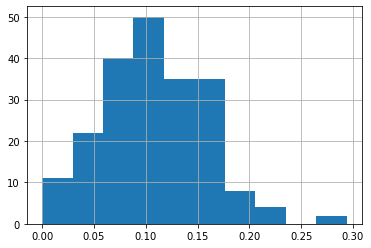

0.105774728416238


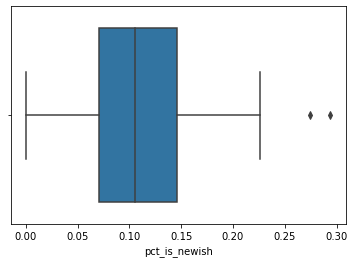

2


In [82]:
x = "pct_is_newish"
data[x].hist()
plt.show()
print(data[x].median())
sns.boxplot(data[x])
plt.show()
data['z'] = np.abs(stats.zscore(data[x]))
#print(np.where(z > 3))
print(len(data[data['z'] > 3]))
data = data[data['z'] <= 3]

In [84]:
print(len(data))
data.to_csv("data_no_outlier.csv", index = False)

205


In [107]:
x_train = pd.read_csv("data_no_outlier.csv")
y_train = x_train['class']
x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl','z',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)

#x_train =  StandardScaler().fit_transform(x_train) 

x_train[['pct_is_new','pct_is_newish','wrcr','human','cited_by_clin','n_biggest_anc','animal',
        'pct_top_5_anc','is_research_article','molecular_cellular','nih']] = minmax_scale(x_train[[
    'pct_is_new','pct_is_newish','wrcr','human','cited_by_clin','n_biggest_anc','animal',
        'pct_top_5_anc','is_research_article','molecular_cellular','nih']])

'''col_names = ['rcr_hi', 'rcr_mid']
features = x_train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
x_train[col_names] = features'''

y_train = np.array(y_train)
model = LogisticRegression(random_state=0, C = 1).fit(x_train,y_train) ##logistioc
    
print(model.intercept_, model.coef_, model.score(x_train, y_train))
scores = cross_val_score(model, x_train, y_train, cv=10,scoring = "f1")
print("cross validated f1 score ",scores.mean())

[-0.74054727] [[ 1.39447686  0.88468923  0.32792243 -0.04256983 -0.36001118  0.92233518
  -0.54938659  0.25434871  0.62044892  0.73292954  0.15282832 -0.5399761
   0.15045997 -0.60370259  0.91818114 -0.01431408 -0.41750418]] 0.7804878048780488
cross validated f1 score  0.7495736358584655


actual len  5621
len of xtest  184
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr_hi                          float64
human                           float64
anima

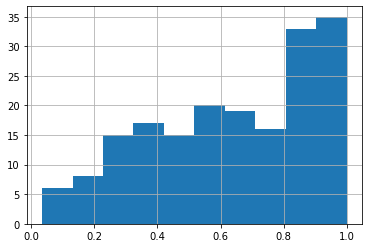

$$$  184   107
total positive  107
tp tn fp fn 0   0   0   0
year  1978 positive  0
actual len  5840
len of xtest  218
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                       int64
n_biggest_anc                     int64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                  int64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
r

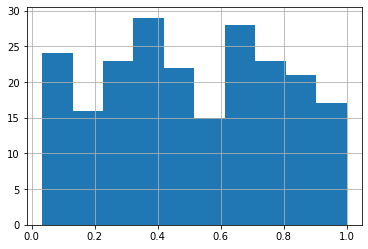

$$$  218   90
total positive  90
tp tn fp fn 0   0   0   0
year  1979 positive  0
actual len  6110
len of xtest  230
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr

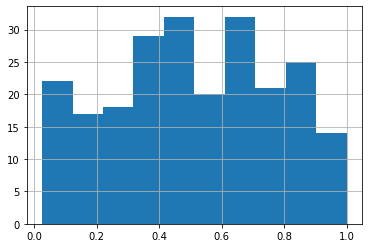

$$$  230   94
total positive  94
tp tn fp fn 0   0   0   0
year  1980 positive  0
actual len  6410
len of xtest  263
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr

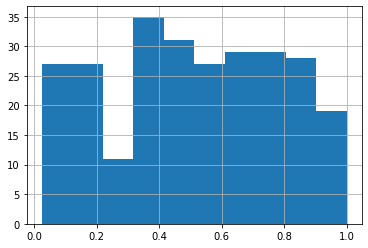

$$$  263   106
total positive  106
tp tn fp fn 0   0   0   0
year  1981 positive  0
actual len  6647
len of xtest  289
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
r

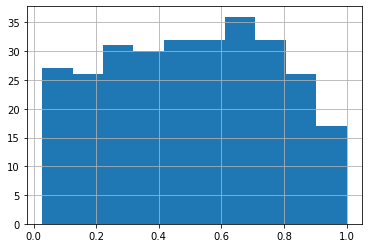

$$$  289   113
total positive  113
tp tn fp fn 0   0   0   0
year  1982 positive  0
actual len  6902
len of xtest  323
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
r

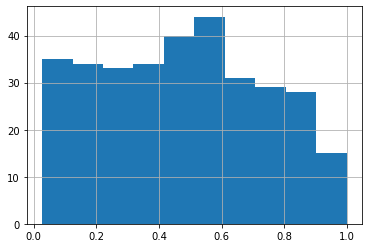

$$$  323   106
total positive  106
tp tn fp fn 0   0   0   0
year  1983 positive  0
actual len  7233
len of xtest  357
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
r

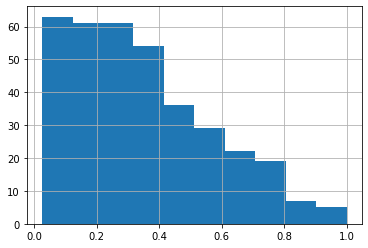

$$$  357   57
total positive  57
tp tn fp fn 0   0   0   0
year  1984 positive  0
actual len  7596
len of xtest  381
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr

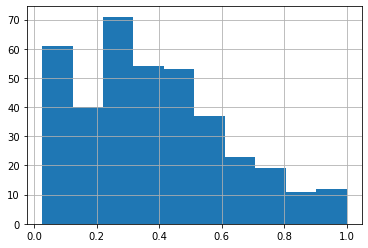

$$$  381   68
total positive  68
tp tn fp fn 0   0   0   0
year  1985 positive  0
actual len  7987
len of xtest  427
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr

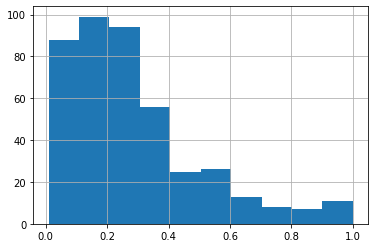

$$$  427   39
total positive  39
tp tn fp fn 0   0   0   0
year  1986 positive  0
actual len  8301
len of xtest  464
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr

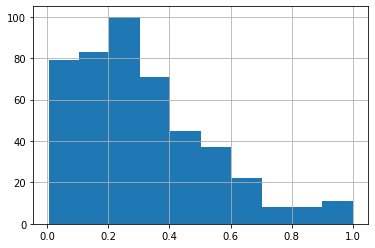

$$$  464   50
total positive  50
tp tn fp fn 0   0   0   0
year  1987 positive  0
actual len  8743
len of xtest  499
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr

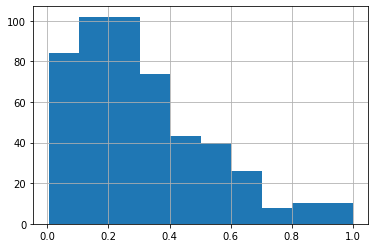

$$$  499   56
total positive  56
tp tn fp fn 0   0   0   0
year  1988 positive  0
actual len  9089
len of xtest  529
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr

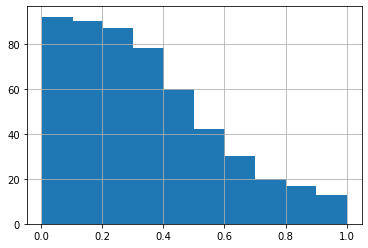

$$$  529   80
total positive  80
tp tn fp fn 0   0   0   0
year  1989 positive  0
actual len  9467
len of xtest  567
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr

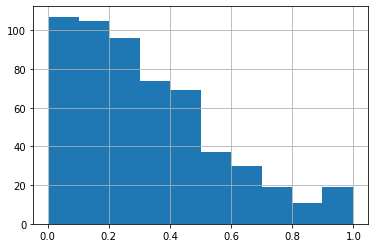

$$$  567   79
total positive  79
tp tn fp fn 0   0   0   0
year  1990 positive  0
actual len  9825
len of xtest  621
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr

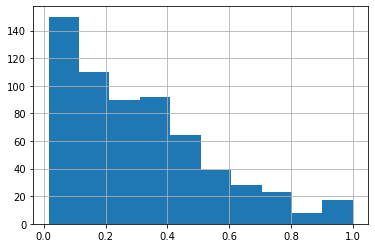

$$$  621   76
total positive  76
tp tn fp fn 0   0   0   0
year  1991 positive  0
actual len  10202
len of xtest  660
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rc

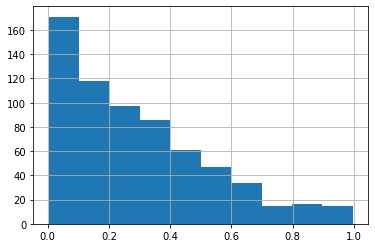

$$$  660   79
total positive  79
tp tn fp fn 0   0   0   0
year  1992 positive  0
actual len  10609
len of xtest  708
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rc

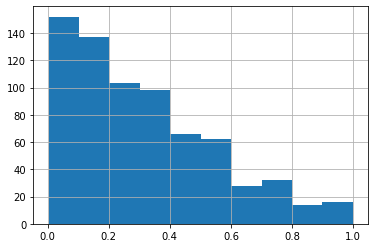

$$$  708   90
total positive  90
tp tn fp fn 0   0   0   1
year  1993 positive  1
actual len  10974
len of xtest  789
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rc

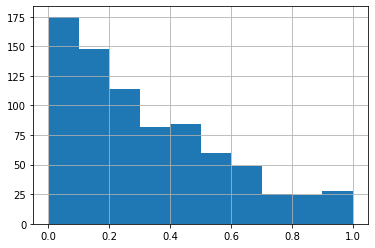

$$$  789   126
total positive  126
tp tn fp fn 0   0   0   0
year  1994 positive  0
actual len  11393
len of xtest  860
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64


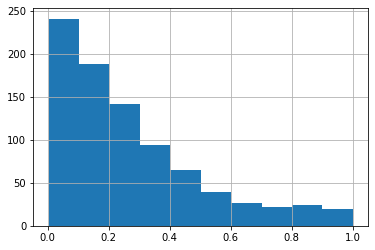

$$$  860   91
total positive  91
tp tn fp fn 0   0   0   0
year  1995 positive  0
actual len  11780
len of xtest  907
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rc

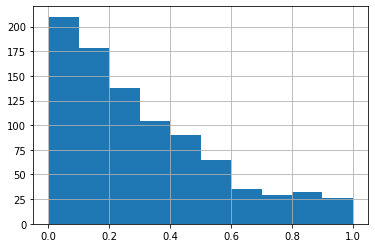

$$$  907   122
total positive  122
tp tn fp fn 1   0   0   0
year  1996 positive  1
actual len  12157
len of xtest  979
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64


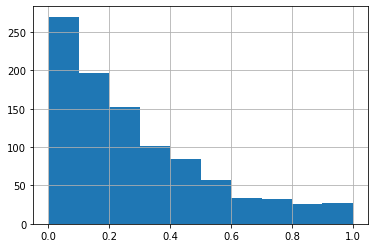

$$$  979   119
total positive  119
tp tn fp fn 0   0   0   0
year  1997 positive  0
actual len  12606
len of xtest  1033
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64

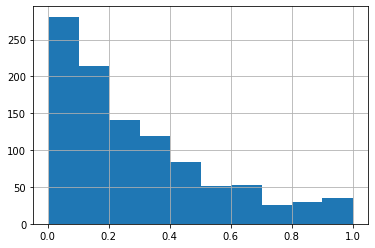

$$$  1033   143
total positive  143
tp tn fp fn 2   0   0   1
year  1998 positive  3
actual len  13116
len of xtest  1099
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

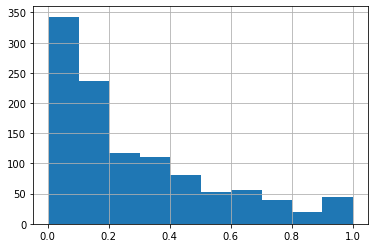

$$$  1099   158
total positive  158
tp tn fp fn 0   1   0   1
year  1999 positive  1
actual len  13664
len of xtest  1137
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

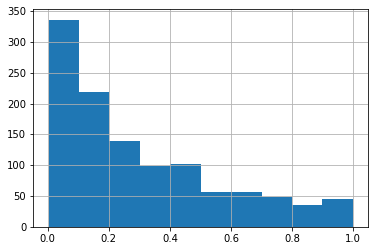

$$$  1137   186
total positive  186
tp tn fp fn 1   0   1   2
year  2000 positive  3
actual len  14240
len of xtest  1183
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

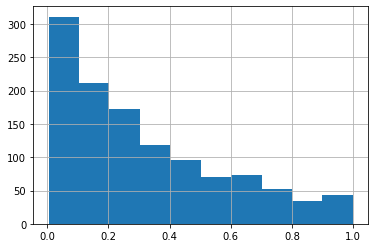

$$$  1183   205
total positive  205
tp tn fp fn 0   0   0   0
year  2001 positive  0
actual len  14757
len of xtest  1208
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

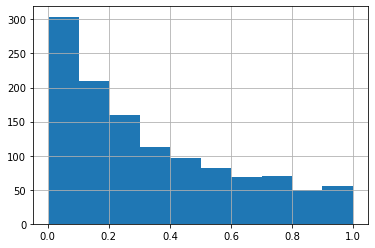

$$$  1208   245
total positive  245
tp tn fp fn 0   0   0   0
year  2002 positive  0
actual len  15262
len of xtest  1252
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                       int64
n_biggest_anc                     int64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                  int64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

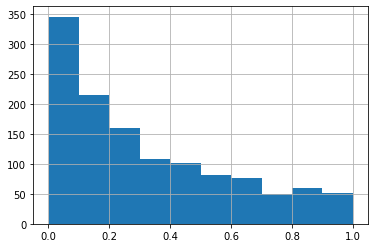

$$$  1252   237
total positive  237
tp tn fp fn 1   0   0   0
year  2003 positive  1
actual len  15787
len of xtest  1321
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

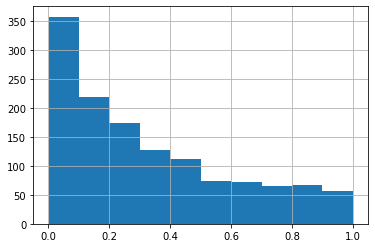

$$$  1321   260
total positive  260
tp tn fp fn 0   0   0   0
year  2004 positive  0
actual len  16382
len of xtest  1365
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

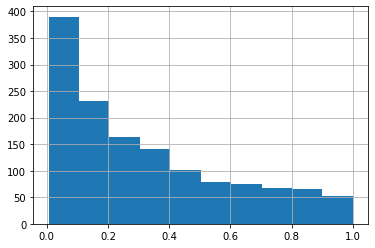

$$$  1365   260
total positive  260
tp tn fp fn 0   0   0   0
year  2005 positive  0
actual len  17084
len of xtest  1396
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

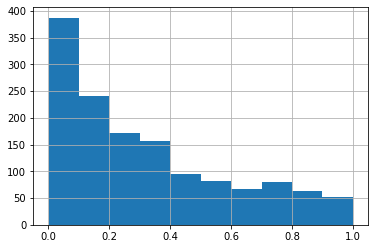

$$$  1396   263
total positive  263
tp tn fp fn 1   0   0   0
year  2006 positive  1
actual len  17653
len of xtest  1456
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

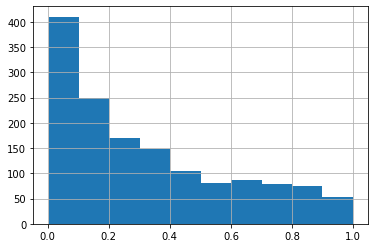

$$$  1456   291
total positive  291
tp tn fp fn 3   1   1   0
year  2007 positive  3
actual len  18303
len of xtest  1506
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

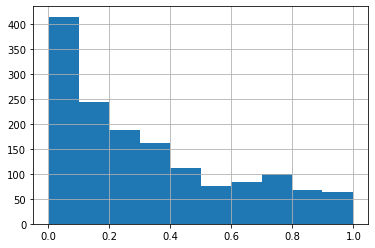

$$$  1506   313
total positive  313
tp tn fp fn 4   0   2   0
year  2008 positive  4
actual len  18833
len of xtest  1580
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

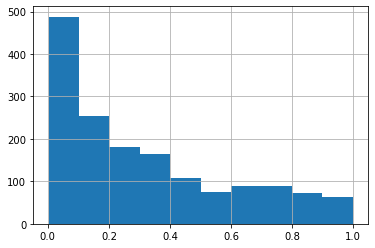

$$$  1580   313
total positive  313
tp tn fp fn 4   2   1   1
year  2009 positive  5
actual len  19499
len of xtest  1634
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

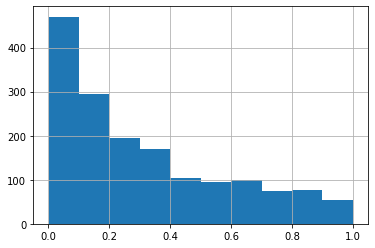

$$$  1634   306
total positive  306
tp tn fp fn 5   2   0   2
year  2010 positive  7
actual len  20126
len of xtest  1673
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

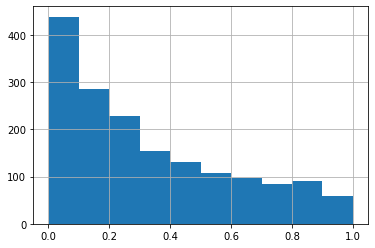

$$$  1673   331
total positive  331
tp tn fp fn 8   5   1   4
year  2011 positive  12
actual len  20856
len of xtest  1743
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float

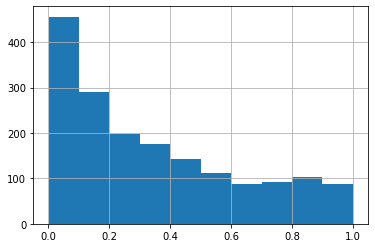

$$$  1743   370
total positive  370
tp tn fp fn 11   5   2   3
year  2012 positive  14
actual len  21671
len of xtest  1853
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         floa

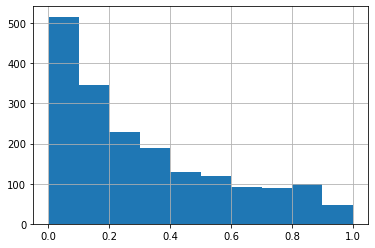

$$$  1853   327
total positive  327
tp tn fp fn 10   7   0   1
year  2013 positive  11
actual len  22577
len of xtest  1951
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         floa

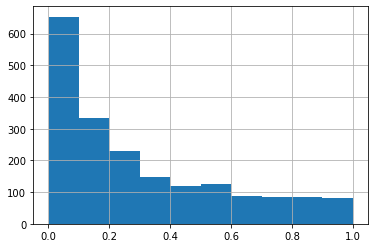

$$$  1951   340
total positive  340
tp tn fp fn 4   4   2   3
year  2014 positive  7
actual len  23437
len of xtest  2049
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

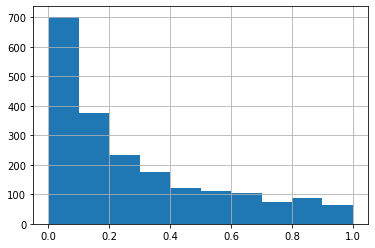

$$$  2049   332
total positive  332
tp tn fp fn 2   0   0   1
year  2015 positive  3
actual len  24395
len of xtest  2110
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

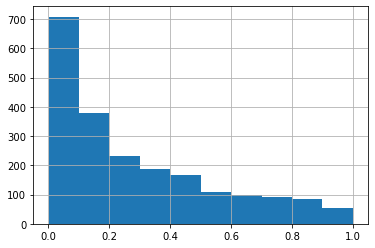

$$$  2110   329
total positive  329
tp tn fp fn 2   3   0   1
year  2016 positive  3
actual len  25382
len of xtest  2180
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

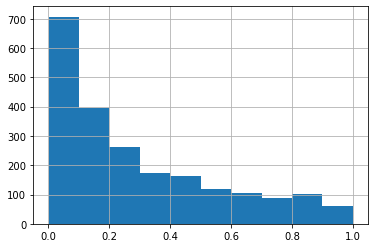

$$$  2180   357
total positive  357
tp tn fp fn 5   1   1   1
year  2017 positive  6
actual len  26313
len of xtest  2256
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

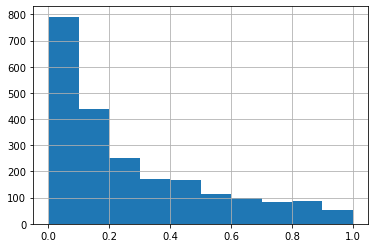

$$$  2256   322
total positive  322
tp tn fp fn 2   2   1   3
year  2018 positive  5
actual len  27361
len of xtest  2368
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

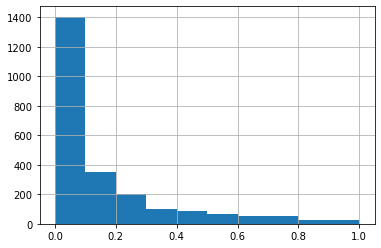

$$$  2368   165
total positive  165
tp tn fp fn 1   2   0   2
year  2019 positive  3
actual len  28712
len of xtest  2482
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
biggest_anc                     float64
n_biggest_anc                   float64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                float64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                 float64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float6

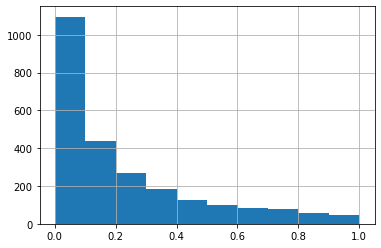

$$$  2482   264
total positive  264
tp tn fp fn 1   0   0   1
year  2020 positive  2
total pos  96  true pos  68  total false pos  185.97674418604652


In [11]:
##this one doing the best for direct. But it is a bit different than outcites.
def remove_outlier(data):
    x = ['rcr_hi','human','cited_by_clin','pct_is_new','n_biggest_anc','pct_top_5_anc','animal','rcr_mid',
         'wrcr','is_research_article','molecular_cellular','nih',"pct_is_newish"]
    for i in x:
        data['z'] = np.abs(stats.zscore(data[i]))
        data = data[data['z'] <= 3]
    return data
    
def recall2(pred,th, yr):
    data = pd.read_csv("data_no_outlier.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]
    ll = 350
    tot = 0
    ress = pd.merge(data,pred,on='cluster', how = 'inner')
    
    tp,tn,fp, fn = 0,0,0,0
    pred = pred.sort_values(by=['pred_log'], ascending = False)
    res = pred.head(ll)
    for ind in res.index:
        cl = res['cluster'][ind]
        dd = data[data['cluster'] == cl]
        if len(dd) != 0:
            dd = dd.to_numpy()
            cls = dd[0][dd.shape[1] - 1]
            if cls == 1:
                tp += 1
            else:
                fp += 1
        else:
            fp += 1
       
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", ll)
    print("tp fp",tp," ",fp)
    total_pos = len(ress[ress['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,ll - tp

def recall(pred,th, yr):
    data = pd.read_csv("data_no_outlier.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]

    tot = 0
    res = pd.merge(data,pred,on='cluster', how = 'inner')
    tp,tn,fp, fn = 0,0,0,0
    for ind in res.index:
        if res['class'][ind] == 1 and res['pred_log'][ind] >= th:
            tp += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] < th:
            tn += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] >= th:
            fp += 1
        elif res['class'][ind] == 1 and res['pred_log'][ind] < th:
            fn += 1
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", len(pred))
    print("tp tn fp fn",tp," ",tn," ",fp," ",fn)
    total_pos = len(res[res['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,len(pred[pred['pred_log'] >= th]) - tp


def train(x_train):
    
    
  
    y_train = x_train['class']
    
    '''x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl','z',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)


    x_train[['pct_is_new','pct_is_newish','wrcr','human','cited_by_clin','n_biggest_anc','animal',
        'pct_top_5_anc','is_research_article','molecular_cellular','nih']] = minmax_scale(x_train[[
    'pct_is_new','pct_is_newish','wrcr','human','cited_by_clin','n_biggest_anc','animal',
        'pct_top_5_anc','is_research_article','molecular_cellular','nih']])'''
    
    '''x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl','z',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    
    
    x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['z','cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','class'], axis = 1)
    
    
    y_train = np.array(y_train)
 
    model = LogisticRegression(random_state=0, C = 100).fit(x_train,y_train) ##logistioc
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model
    
tot,tp,total_fp = 0,0,0
yr = 1978

while yr <= 2020:
    
    x_train = pd.read_csv("data_no_outlier.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_direct/features_prediction_"+str(yr)+".csv")
    print("actual len ",len(x_test))
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    #x_test = remove_outlier(x_test)
    
   
    x_test = x_test[x_test['rcr_hi'] >= 1.00]
    x_test = x_test[x_test['cited_by_clin'] >= 0.080]
    #x_test = x_test[x_test['is_clinical'] >= 0.012] ##this one
    x_test = x_test[x_test['animal'] >= 0.01]

    x_test = x_test[x_test['molecular_cellular'] >= 0.010] ##this one, with C = 1
    x_test = x_test[x_test['nih'] >= 0.020]
    x_test = x_test[x_test['human'] >= 0.20]
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    #print(x_test.tail(10))
    
    #x_test = x_test[x_test['is_research_article'] > 0.75]
    
    '''x_test = x_test.drop(['prediction','cluster','year','n',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)


    x_test[['pct_is_new','pct_is_newish','wrcr','human','cited_by_clin','n_biggest_anc','animal',
        'pct_top_5_anc','is_research_article','molecular_cellular','nih']] = minmax_scale(x_test[[
    'pct_is_new','pct_is_newish','wrcr','human','cited_by_clin','n_biggest_anc','animal',
        'pct_top_5_anc','is_research_article','molecular_cellular','nih']])'''
    
    
    '''x_test = x_test.drop(['prediction','cluster','year','n',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)'''
    
    '''x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    print(x_test.dtypes)
    x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_test = x_test.drop(['cluster','year','n','pct_is_newish','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)
    x_test = x_test.drop(['prediction','pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low'], axis=1)
    
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))
    print("year  ",yr)
    print(x_train['year'].unique())

    model = train(x_train)
    
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] >= 0.60]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    
    
    
    copy_test['pred_log'] = pred_test
    copy_test['pred_log'].hist()
    plt.show()
    
    
    print("$$$ ",len(copy_test)," ",len(copy_test[copy_test['pred_log'] >= 0.60]))
    a, b,c = recall(copy_test,0.60, yr)
    tot += a
    tp += b
    total_fp += c
    yr += 1
print("total pos ",tot," true pos ", tp," total false pos ",total_fp/43)

In [116]:
data = pd.read_csv("data_no_outlier.csv")
data = data[data['n'] > 100]
print(len(data[data['class'] == 1]))

105
